# Analyzing Market Potential for a Robotic Café in LA

## Table of Contents <a id='back'></a>

* [Introduction](#intro)
    * [Objectives](#tujuan)
    * [Steps](#tahap)
* [Step 1: Loading Data](#data)
    * [Importing Libraries](#lib)
    * [Loading Data](#data1)
* [Step 2: Data Exploration](#explore)
* [Step 3: Data Preprocessing](#pra)
* [Step 4: Data Analysis](#analysis)
    * [Proportions of Various Business Types](#analysis1)
    * [Proportion of Franchise vs. Non-Franchise Businesses (RICE)](#analysis2)
    * [Business Types Typically Operated as Franchises](#analysis3)
    * [Characteristics of Franchise-Based Businesses](#analysis4)
    * [Average Number of Seats for Each Business Type](#analysis5)
    * [Top 10 Streets by Number of Businesses](#analysis6)
    * [Number of Streets with Only One Business](#analysis7)
    * [Seat Distribution for Business Types on Top Streets](#analysis8)
* [Analysis Summary](#end)

## Introduction <a id='intro'></a>

This project focuses on data analysis for a small café business planned to open in Los Angeles, featuring robots as waiters or waitresses. This unique concept is seen as promising but requires significant capital investment and support from investors who are interested in the current market conditions.

To prepare for market research, open-source data related to various types of dining establishments in Los Angeles will be used as the foundation for data analysis. This analysis will evaluate the market potential for this unique café concept, considering additional factors such as competition in the area.

In this project, data analysis will serve as a critical tool to assist stakeholders in making informed business decisions. Accurate and thorough analysis will help reduce the risks of business failure and increase the likelihood of success. Therefore, this project must be executed with precision and care. This report outlines the steps taken in the data analysis, along with findings and recommendations, to ensure the café's business success.

### Objectives: <a id='tujuan'></a>

The primary objectives of the data analysis in this project are:  

1. **To identify market potential** for a café with robot servers in Los Angeles.  
2. **To assess other critical factors** influencing the café's success, such as the level of competition in the area.  
3. **To provide data-driven recommendations** that will assist stakeholders in making better business decisions and mitigate risks.  

Through accurate and detailed analysis, this project aims to provide a comprehensive foundation for informed decision-making and business planning.

### Steps: <a id='tahap'></a>

This project consists of the following four main steps:  

1. **Loading Data**: Importing and understanding the data structure.  
2. **Data Exploration**: Gaining initial insights into the dataset by summarizing, visualizing, and examining key characteristics.  
3. **Data Preprocessing**: Cleaning and preparing the data for accurate analysis by addressing any inconsistencies or anomalies.  
4. **Data Analysis**: Conducting in-depth analysis to answer specific business questions, including:  
    - Proportions of various business types.  
    - The prevalence of franchise vs. non-franchise businesses.  
    - Identifying common characteristics of successful business types.  
    - Analyzing average seating capacity and competitive locations.  
    - Exploring the spatial distribution of businesses across Los Angeles.  

The analysis will culminate in actionable insights and recommendations, presented through visualizations and a clear summary. These findings will support strategic decision-making for launching a café with a futuristic robot-centric concept.

## Step 1: Loading Data <a id='data'></a>

### Loading Libraries <a id='lib'></a>

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio

import warnings
warnings.filterwarnings('ignore')

### Loading the Dataset  <a id='data1'></a>

In [2]:
# Loading the dataset
try:
    data = pd.read_csv('rest_data_us.csv')
except:
    data = pd.read_csv('/datasets/rest_data_us.csv') 

The dataset is loaded into a DataFrame named `data`. The code includes a fallback path in case the dataset is located in a different directory.

Further steps will include inspecting the structure of the dataset and preparing it for analysis.

## Step 2: Data Exploratio <a id='explore'></a>

Inspecting the First 5 Rows:

In [3]:
# Displaying the first 5 rows of the dataset
data.head()

,id,object_name,address,chain,object_type,number
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26
1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20


The dataset contains information about various types of dining establishments in Los Angeles with the following columns:

- `ID` — A unique identifier for each establishment.  
- `object_name` — The name of the establishment.  
- `chain` — Indicates whether the establishment is part of a franchise (TRUE/FALSE).  
- `object_type` — The type of dining establishment (e.g., Cafe, Restaurant, or Fast Food).  
- `address` — The address of the establishment.  
- `number` — The number of seats available at the establishment.

Checking the Dataset Dimensions:

In [4]:
# Checking the dataset size
data.shape

(9651, 6)

General Information About the Dataset:

In [5]:
# Displaying general information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9651 entries, 0 to 9650
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           9651 non-null   int64 
 1   object_name  9651 non-null   object
 2   address      9651 non-null   object
 3   chain        9648 non-null   object
 4   object_type  9651 non-null   object
 5   number       9651 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 452.5+ KB


Counting Missing Values:

In [6]:
# Counting missing values
data.isna().sum()

id             0
object_name    0
address        0
chain          3
object_type    0
number         0
dtype: int64

Checking for Duplicates:

In [7]:
# Checking for duplicate entries
data.duplicated().sum()

0

**Findings:**

- The dataset consists of **9651 rows** and **6 columns**.  
- Each row represents information about a dining establishment, including its unique ID, name, type, address, number of seats, and whether it is part of a franchise.  
- Missing values were found in the `chain` column, indicating incomplete data about whether certain establishments are part of a franchise.  
- The `chain` column's data type is not yet boolean and will need adjustment during preprocessing.  
- No duplicate rows were detected (assuming no duplicates appear in the result).  

These findings highlight areas to address during the preprocessing stage to ensure the data is clean and ready for analysis.

## Step 3: Data Preprocessing <a id='pra'></a>

Previously, missing values were identified in the dataset. However, the proportion of missing values is very small compared to the overall data. To confirm this, the percentage of missing values in the dataset is calculated.

In [8]:
# Calculating the Percentage of Missing Values
data.isna().sum() / data.shape[0] * 100

id             0.000000
object_name    0.000000
address        0.000000
chain          0.031085
object_type    0.000000
number         0.000000
dtype: float64

From the result, we see that the percentage of missing values is only 0.03%, which is a very small proportion. Therefore, the missing values can be removed.

In [9]:
# remove missing values
data = data.dropna().reset_index(drop=True)

Verifying Missing Values:

In [10]:
# Rechecking if there are any missing values
data.isna().sum()

id             0
object_name    0
address        0
chain          0
object_type    0
number         0
dtype: int64

The missing values have been successfully addressed.

Changing Data Type to Boolean:

The data type of the `chain` column is converted to `bool`:

In [11]:
# Converting the data type
data.chain = data.chain.astype(bool)

In [12]:
# Checking the data types
data.dtypes

id              int64
object_name    object
address        object
chain            bool
object_type    object
number          int64
dtype: object

**Summary:**

- The missing values comprised only **0.03%** of the total data, so they were removed without significantly impacting the dataset.
- The data type of the chain column was successfully converted from `object` to `bool`.

## Step 4: Data Analysis <a id='analysis'></a>

### Proportion of Various Business Types <a id='analysis1'></a>

The first analysis focuses on the proportion of different types of businesses.

Reviewing the Dataset:

In [13]:
# Viewing the dataset
data.head()

,id,object_name,address,chain,object_type,number
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26
1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20


In [14]:
# Checking unique business types
data.object_type.unique()

array(['Cafe', 'Restaurant', 'Fast Food', 'Bakery', 'Bar', 'Pizza'],
      dtype=object)

There are **6** types of businesses: `Cafe`, `Restaurant`, `Fast Food`, `Bakery`, `Bar`, and `Pizza`.

Counting Businesses by Type:

In [15]:
# Counting the number of businesses by type
grouped_data = data.groupby('object_type').count()
grouped_data.reset_index(inplace=True)
grouped_data[['object_type', 'id']]

,object_type,id
0,Bakery,283
1,Bar,292
2,Cafe,435
3,Fast Food,1066
4,Pizza,319
5,Restaurant,7253


Visualizing the Data:

Bar Chart:

In [16]:
# Creating a bar chart
fig = px.bar(grouped_data, x='object_type', y='id', 
             labels={'id':'Count', 'object_type':'Business Type'}, 
             title='Proportion of Business Types in LA',
             template='plotly_white',
             text_auto=True)
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.show()

Pie Chart:

In [17]:
# Creating a pie chart
fig = px.pie(grouped_data, names='object_type', values='id', 
             labels={'id':'Count', 'object_type':'Business Type'}, 
             title='Proportion of Business Types in LA',
             template='plotly_white')
fig.show()

**Findings:**

- **`Restaurant`** is the most common business type, accounting for **75.2%** (7253 units).
- **`Bakery`** has the smallest proportion, making up only **2.93%** (283 units).
- **`Cafe`** ranks third, with a proportion of **4.51%** (435 units).

**Insights:**

- The proportion of a business type can serve as an indicator of market competition—higher proportions suggest greater competition.
- `Cafe` is the third most popular business type but has a significantly smaller share compared to the top two, indicating that competition among cafes in LA is relatively moderate.

**Recommendations:**

- Before starting a business, it is advisable to consider the proportion of each business type to gauge potential competition.
- The relatively moderate competition among cafes could make it a viable option for new ventures.

### Franchise and Non-Franchise Business Proportion <a id='analysis2'></a>

The next step involves calculating the proportion of franchise and non-franchise businesses by analyzing the `chain` column.

Calculating Franchise and Non-Franchise Businesses:

In [18]:
# Counting franchise and non-franchise businesses
chain = data.groupby('chain').count()
chain.reset_index(inplace=True)
chain[['chain', 'id']]

,chain,id
0,False,5972
1,True,3676


Visualizing the Data:

Bar Chart:

In [19]:
# Creating a bar chart
fig = px.bar(chain, x='chain', y='id', 
             labels={'id':'Count', 'chain':'Franchise'}, 
             title='Proportion of Franchise and Non-Franchise Businesses in LA',
             template='plotly_white',
             text_auto=True)
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.show()

Pie Chart:

In [20]:
# Creating a pie chart
fig = px.pie(chain, names='chain', values='id', 
             labels={'id':'Count', 'chain':'Franchise'}, 
             title='Proportion of Franchise and Non-Franchise Businesses in LA',
             template='plotly_white')
fig.show()

**Findings:**

- **Franchise businesses** account for only **38.1%** of the total, representing **3676** units.
- **Non-franchise businesses** dominate with a proportion of **61.9%**, totaling **5972** units.

**Insights:**

- Non-franchise businesses make up the majority of the market, which may suggest fewer entry barriers for independent businesses compared to franchises.
- The dominance of non-franchise businesses could also indicate a preference among customers for unique, independent establishments.

**Recommendations:**

- Entrepreneurs considering entering the market may find opportunities in non-franchise businesses, as they represent a larger share of the market.
- For a franchise-based business, highlighting its distinctiveness and added value could help stand out in the competitive landscape.

### Types of Businesses Commonly Based on Franchising <a id='analysis3'></a>

To determine the types of businesses that are predominantly franchise-based, it is necessary to calculate the ratio of franchise-based businesses to the total number of establishments for each business type. Before proceeding, let’s take another look at the dataset:

In [21]:
# Displaying the dataset
data.head()

,id,object_name,address,chain,object_type,number
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26
1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20


Visualizing Franchise vs. Non-Franchise Businesses by Type

The graph below illustrates the count of franchise and non-franchise businesses for each business type:

In [22]:
# Visualizing franchise counts for each business type
fig = px.histogram(data, x='object_type', y='chain',
             color='chain', barmode='group',
             histfunc='count',
             labels={'object_type':'Business Type', 'chain':'Franchise'}, 
             title='Franchise vs. Non-Franchise Businesses by Type in LA',
             template='plotly_white',
             text_auto=True)
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.show()

From the graph, **Restaurants** have the highest count, but their franchise-based ratio does not exceed half. To confirm the ratios, a `pivot_table` is created to calculate the number of franchise and non-franchise businesses for each type, followed by computing the franchise ratio.

In [23]:
# Creating pivot_table
object_chain = pd.pivot_table(data, values='object_name',
                              index='object_type', columns=['chain'], 
                              aggfunc='count').fillna(0)
object_chain

chain,False,True
object_type,,
Bakery,0.0,283.0
Bar,215.0,77.0
Cafe,169.0,266.0
Fast Food,461.0,605.0
Pizza,166.0,153.0
Restaurant,4961.0,2292.0


In [24]:
# Calculating franchise ratios
object_chain['ratio'] = object_chain[True] / (object_chain[True] + object_chain[False]) * 100
object_chain.reset_index(inplace=True)
object_chain

chain,object_type,False,True,ratio
0,Bakery,0.0,283.0,100.000000
1,Bar,215.0,77.0,26.369863
2,Cafe,169.0,266.0,61.149425
3,Fast Food,461.0,605.0,56.754221
4,Pizza,166.0,153.0,47.962382
5,Restaurant,4961.0,2292.0,31.600717


Franchise Ratios by Business Type

The chart below visualizes the franchise ratios:

In [25]:
# Visualizing franchise ratios
fig = px.bar(object_chain, x='object_type', y='ratio', 
             labels={'object_type':'Business Type'}, 
             title='Franchise Ratios by Business Type in LA',
             template='plotly_white',
             text_auto='.2s')
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.show()

**Findings:**

- **Bakery** businesses are entirely franchise-based, with a ratio of **100%**.
- **Cafe** businesses have a high franchise proportion of **61.15%**.
- While **Restaurants** have the highest number of establishments, their franchise ratio is only **31.60%**, indicating that the majority are independently owned.

**Insights:**

- The dominance of franchise-based businesses varies significantly by type. For example, bakeries stand out as being completely franchise-based, which suggests strong brand influence in this sector.
- Cafes and fast-food businesses also show high franchise ratios, reflecting their scalability and operational standardization.

**Recommendations:**

- Entrepreneurs looking to open a **Cafe** may consider franchising, as it is a common model in this sector and may offer operational advantages.
- Those interested in the **Restaurant** sector may focus on creating unique, independent concepts, as the market is less dominated by franchises.


### Characteristics of Franchise-Based Businesses <a id='analysis4'></a>

To identify the characteristics of franchise-based businesses, the distribution of the number of seats in these establishments is analyzed. The first step is to filter the dataset where the column `chain` is set to `True`.

In [26]:
# Filtering the dataset
data_chain = data[data.chain == True]
data_chain.head()

,id,object_name,address,chain,object_type,number
8,11794,ABC DONUTS,3027 N SAN FERNANDO RD UNIT 103,True,Fast Food,1
10,11796,EL POLLO LOCO,5319 W SUNSET BLVD,True,Restaurant,38
11,11797,POONG NYUN BAKERY,928 S WESTERN AVE STE 109,True,Bakery,17
12,11798,EMC RESTAURANT GROUP LLC,3500 W 6TH ST STE 101,True,Restaurant,133
14,11800,CUSCATLECA BAKERY,2501 W SUNSET BLVD #A,True,Bakery,26


Counting the Number of Seats:

In [27]:
# Menghitung jumlah kursi
data_chain.object_name.value_counts().head()

object_name
THE COFFEE BEAN & TEA LEAF    47
SUBWAY                        31
DOMINO'S PIZZA                15
KENTUCKY FRIED CHICKEN        14
WABA GRILL                    14
Name: count, dtype: int64

After counting the seats for each franchise unit, the data is visualized using a distribution plot:

<Figure size 1800x1400 with 0 Axes>

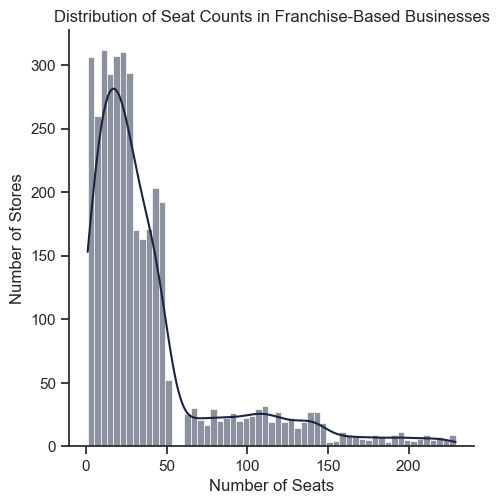

In [28]:
# Creating the distribution plot
sns.set_theme(style='ticks', palette='cubehelix')
plt.figure(figsize=(18,14))
sns.displot(data_chain.number, kde=True)
plt.title('Distribution of Seat Counts in Franchise-Based Businesses')
plt.xlabel('Number of Seats')
plt.ylabel('Number of Stores')
plt.show()


Analyzing Seat Counts:

In [29]:
less_50 = data_chain[data_chain.number <= 50].shape[0]
print('Number of franchises with 50 or fewer seats: ', less_50)

more_50 = data_chain[data_chain.number > 50].shape[0]
print('Number of franchises with more than 50 seats: ', more_50)

Number of franchises with 50 or fewer seats:  3033
Number of franchises with more than 50 seats:  643


**Findings:**

- The majority of franchise-based businesses in LA tend to have **50 or fewer seats**, totaling **3,033 units**.
- Only a small proportion, **643 units**, provide more than 50 seats. This suggests that smaller seating capacities are a defining characteristic of many franchise-based businesses.

**Insights:**

- The predominance of franchises with fewer than 50 seats could indicate a preference for compact and efficient layouts, suitable for high customer turnover or urban settings.
- Larger franchises with more than 50 seats may cater to different markets, such as families or group gatherings, but they are significantly less common.

**Recommendations:**

- For prospective franchise owners, focusing on models with fewer than 50 seats may align with market trends and consumer preferences in LA.
- Franchises aiming to differentiate themselves could explore larger seating capacities, especially in areas with demand for group dining.

### Average Number of Seats Across Business Types <a id='analysis5'></a>

After analyzing the distribution of seat numbers in franchise-based businesses, the next step is to determine the average number of seats for each business type.

In [30]:
# Reviewing the dataset
data.head()

,id,object_name,address,chain,object_type,number
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26
1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20


The average seat count is calculated using the `data` dataset, and the results are visualized using a `histogram` from Plotly:

In [31]:
# Creating a histogram of average seats by business type
fig = px.histogram(data, x='object_type', y='number',
             histfunc='avg',
             labels={'object_type':'Business Type', 'number':'Average Seats'}, 
             title='Average Number of Seats by Business Type in LA',
             template= 'plotly_white',
             text_auto='.2s')
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.show()

**Findings:**

The average seat count for each business type in Los Angeles is as follows:
- **Cafes:** 25 seats on average.
- **Restaurants:** 48 seats on average.
- **Fast Food outlets:** 32 seats on average.
- **Bakeries:** 22 seats on average.
- **Bars:** 45 seats on average.
- **Pizza places:** 29 seats on average.

**Insights:**

- **Restaurants** have the highest average seating capacity (48 seats), reflecting their role as sit-down establishments that cater to larger groups or longer dining experiences.
- **Bakeries** have the lowest average seating capacity (22 seats), possibly due to their emphasis on quick service or takeaway orders.
- **Fast Food outlets** and **Pizza places** have moderate seating capacities, which may indicate a balance between quick service and accommodating customers who choose to dine in.
- **Bars** have a relatively high average of 45 seats, likely to accommodate groups in a social setting.

**Recommendations:**

- For new businesses considering the market, the seating capacity should align with the typical operations of their chosen business type. For example:
  - A **Cafe** should focus on a compact and cozy seating arrangement.
  - A **Restaurant** or **Bar** may benefit from offering more seating to cater to larger gatherings.
  - **Bakeries** should prioritize takeaway options, as their seating capacity is the lowest.
- Benchmarking the average seat count could help businesses set realistic goals for space planning and operations.

### Top 10 Streets with the Highest Number of Businesses <a id='analysis6'></a>

This analysis identifies the top ten streets in Los Angeles with the highest concentration of businesses.

In [32]:
# Reviewing the dataset
data.head()

,id,object_name,address,chain,object_type,number
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26
1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20


To extract the street names from the business addresses, the data is filtered to remove unit numbers, leaving only the street names.

In [33]:
# Filtering the data to get street names
address = data.address.apply(lambda x: ' '.join(x.split(' ')[1:])).to_frame()
address['count'] = 1
address.head()

,address,count
0,N EAGLE ROCK BLVD,1
1,WORLD WAY # 120,1
2,HOLLYWOOD BLVD # 253,1
3,W SUNSET BLVD,1
4,ECHO PARK AVE,1


The data is grouped by street names, and the total business counts for each street are calculated and sorted in descending order. Finally, the top 10 streets are extracted.

In [34]:
# Calculating and sorting data
top_address = address.groupby('address').sum().sort_values(by='count', ascending=False)

# Extracting the top 10
top_address = top_address.head(10).reset_index()
top_address

,address,count
0,W SUNSET BLVD,296
1,W PICO BLVD,288
2,HOLLYWOOD BLVD,167
3,WILSHIRE BLVD,161
4,S VERMONT AVE,148
5,SANTA MONICA BLVD,146
6,W 3RD ST,145
7,BEVERLY BLVD,135
8,S FIGUEROA ST,134
9,MELROSE AVE,128


A bar chart visualization provides a clearer representation of this data:

In [35]:
# Creating a visualization
fig = px.bar(top_address, x='address', y='count',
             labels={'address':'Street Name', 'count':'Number of Businesses'}, 
             title='Top 10 Streets with the Most Businesses in LA',
             template= 'plotly_white',
             text_auto=True)
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.show()


**Findings:**

- **W SUNSET BLVD** is the busiest street for businesses, with approximately **296 units**.
- **W PICO BLVD** follows closely with **288 businesses**, while **HOLLYWOOD BLVD** comes third with **167 businesses**.
- The remaining streets also show significant business density, ranging between **128 and 161 businesses**.

**Insights:**

- The number of businesses on these streets suggests that they are key commercial hubs in Los Angeles.
- High business density may reflect high foot traffic, which can be beneficial for new ventures. However, it may also indicate intense competition.

**Recommendations:**

- **Before opening a business:** Evaluate the competition in these high-density areas. While high foot traffic is an advantage, the level of competition should also be considered.
- **Consider alternative streets:** If competition is a concern, explore streets with moderate business density but high visibility and accessibility.
- **Conduct traffic studies:** Analyze foot and vehicle traffic on these streets to determine the best potential locations for new ventures.

### Number of Streets with Only One Business <a id='analysis7'></a>

Following the analysis of the top 10 streets with the highest concentration of businesses, we now focus on identifying the number of streets that have only one business.

To calculate the number of streets with just one business, the data was grouped by street names, and streets with a count of exactly one were filtered:

In [36]:
# Filtering and grouping data
address_filtered = address.groupby('address').sum().sort_values(by='count', ascending=False)

# Counting streets with only one business
print('The number of streets with only one business is:', 
      address_filtered[address_filtered['count'] == 1].shape[0])


The number of streets with only one business is: 2481


**Findings:**

- There are **2,481 streets** in Los Angeles that have only **one business**. This represents a significant proportion of the total streets in the dataset.

**Insights:**

- Streets with only one business may indicate areas with low commercial activity or less developed infrastructure.
- These streets could represent opportunities for expansion, especially for businesses targeting untapped markets or areas with little competition.

**Recommendations:**

- **For new businesses:** Consider evaluating these streets for potential expansion, especially if the area is underserved but has potential customer traffic.
- **Conduct further research:** Investigate the demographics and accessibility of these streets to determine their suitability for different business types.
- **Local community engagement:** Engage with the local community to understand their needs and preferences, ensuring a better chance of success when opening a new business in these areas.

### Distribution of Seat Counts for Businesses on the Top Street <a id='analysis8'></a>

As identified earlier, **W SUNSET BLVD** has the highest number of businesses in Los Angeles. This section analyzes the distribution of seat counts for businesses located on this street.

To investigate the seat distribution, the dataset was filtered for businesses located on **W SUNSET BLVD**. The filtered data was visualized using a distribution plot:

In [37]:
# Filtering data for W SUNSET BLVD
address_filtered_2 = data[data.address.str.contains('W SUNSET BLVD')].reset_index(drop=True)
address_filtered_2.head()

,id,object_name,address,chain,object_type,number
0,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22
1,11796,EL POLLO LOCO,5319 W SUNSET BLVD,True,Restaurant,38
2,11800,CUSCATLECA BAKERY,2501 W SUNSET BLVD #A,True,Bakery,26
3,11817,DUNES RESTAURANT,5625 W SUNSET BLVD,True,Restaurant,118
4,11819,ONO HAWAIIAN BBQ,5539 W SUNSET BLVD,True,Restaurant,35


<Figure size 1800x1400 with 0 Axes>

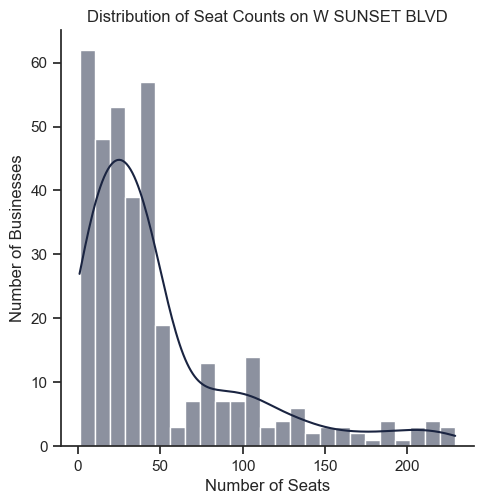

In [38]:
# Creating the distribution plot
plt.figure(figsize=(18,14))
sns.displot(address_filtered_2.number, kde=True)
plt.title('Distribution of Seat Counts on W SUNSET BLVD')
plt.xlabel('Number of Seats')
plt.ylabel('Number of Businesses')
plt.show()

In [39]:
# Calculating seat counts
less_50 = address_filtered_2[address_filtered_2.number <= 50].shape[0]
print('Businesses with seats less than or equal to 50: ', less_50)

more_50 = address_filtered_2[address_filtered_2.number >= 50].shape[0]
print('Businesses with seats more than 50: ', more_50)

Businesses with seats less than or equal to 50:  278
Businesses with seats more than 50:  90


**Findings:**

- Businesses with **50 or fewer seats** dominate the landscape on W SUNSET BLVD, with **278 businesses** in this category.
- Businesses with **more than 50 seats** are relatively scarce, with only **90 businesses**.

**Insights:**

- The dominance of smaller businesses (those with ≤50 seats) could suggest that **W SUNSET BLVD** primarily caters to smaller establishments like cafés, fast-food outlets, or boutique eateries.
- Larger establishments, such as full-scale restaurants or event spaces, are less common on this street.

**Recommendations:**

- **For prospective business owners:** If you are planning to open a business on W SUNSET BLVD, consider aligning with the trend of smaller establishments unless you can secure a niche market for a larger venue.
- **For competitive analysis:** Evaluate the types of smaller businesses thriving in the area to identify gaps or opportunities in the market.

## Analysis Summary <a id='end'></a>

### Project Summary: Business and Seat Distribution in Los Angeles

**Project Background:**

This project analyzes the distribution and characteristics of businesses in Los Angeles, with a focus on identifying trends in franchise-based and non-franchise-based establishments, as well as gaining insights into seating capacity, geographic location, and business density. The primary goal is to provide actionable insights for entrepreneurs, urban planners, and investors.

The dataset includes information on:
1. **Type of Business** (e.g., Café, Restaurant, Bakery, etc.)
2. **Seating Capacity**
3. **Franchise Status**
4. **Business Location** (address data including streets)

The key questions addressed in this analysis include:
- What are the characteristics of franchise-based businesses?
- What is the average seat count for various types of businesses?
- Which streets host the highest number of businesses?
- How many streets have only one business?
- What is the seat distribution of businesses located on the busiest street?

---

**Key Findings:**

**1. Characteristics of Franchise-Based Businesses:**
- **Findings:**
  - 3033 franchise businesses provide **50 or fewer seats**, while only 643 offer more than 50 seats.
  - Smaller setups dominate franchise businesses, emphasizing cost efficiency and scalability.
- **Insights:**
  - Franchise businesses focus on smaller, high-turnover setups rather than large-scale dining.
- **Recommendations:**
  - Entrepreneurs entering the franchise space should design their locations to optimize smaller seating arrangements.

**2. Average Seat Count by Business Type:**
- **Findings:**
  - Restaurants have the highest average seating capacity (**48 seats**), followed by Bars (**45 seats**) and Fast Food establishments (**32 seats**).
  - Cafés and Bakeries have smaller average capacities (**25 and 22 seats**, respectively).
- **Insights:**
  - Larger seating capacities align with businesses offering sit-down experiences, while smaller capacities cater to quick-service models.
- **Recommendations:**
  - Design layouts based on the typical customer interaction model for each business type.

**3. Top 10 Streets by Business Count:**
- **Findings:**
  - The busiest streets are **W SUNSET BLVD (296 businesses)**, **W PICO BLVD (288 businesses)**, and **HOLLYWOOD BLVD (167 businesses)**.
  - These streets represent high-traffic commercial hubs but also entail significant competition.
- **Insights:**
  - Streets with high business density indicate potential for customer traffic but also increased competition.
- **Recommendations:**
  - Evaluate market saturation and customer demographics before opening a business on these streets. Alternatively, explore less saturated areas with growth potential.

**4. Streets with Only One Business:**
- **Findings:**
  - **2481 streets** in Los Angeles have only one business.
- **Insights:**
  - These streets may lack traffic or infrastructure, representing underutilized areas or niche opportunities.
- **Recommendations:**
  - Investigate market potential and infrastructure availability before investing in such areas.

**5. Seat Distribution on W SUNSET BLVD:**
- **Findings:**
  - On **W SUNSET BLVD**, 278 businesses provide **50 or fewer seats**, while 90 businesses offer more than 50 seats.
- **Insights:**
  - The street is dominated by small businesses, aligning with its high density and customer turnover trends.
- **Recommendations:**
  - For new ventures on **W SUNSET BLVD**, prioritize smaller setups unless aiming to cater to unique customer needs.

---

**General Recommendations:**
1. **Franchise vs. Non-Franchise Insights:**
   - Focus on smaller layouts for franchise setups, particularly in competitive, high-traffic areas.

2. **Strategic Location Planning:**
   - Leverage insights from high-density streets for customer accessibility or explore underserved streets for unique opportunities.

3. **Demographic and Traffic Analysis:**
   - Combine this data with demographic and traffic patterns to make more informed business decisions.

4. **Future Directions for Analysis:**
   - Study foot traffic and demographic shifts on busy streets.
   - Investigate zoning, accessibility, and other infrastructural elements impacting business density.

---

This project provides a comprehensive overview of business patterns in Los Angeles, offering valuable guidance for stakeholders aiming to optimize their commercial strategies in the city.

[Return to table of contents](#back)